In [3]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Read the data

In [40]:
df = pd.read_excel('Two way anova dataset.xlsx')
df.sample()

,Department,Experience Level,Productivity Score
34,Marketing,Junior,71


In [42]:
df1 = df.groupby(["Department","Experience Level"])["Productivity Score"].mean()
df1 = pd.DataFrame(df1)
df1

Productivity Score
Department Experience Level                    
HR         Junior                        64.500
           Mid-Level                     77.500
           Senior                        86.250
IT         Junior                        66.000
           Mid-Level                     70.625
           Senior                        84.875
Marketing  Junior                        68.500
           Mid-Level                     80.250
           Senior                        88.250
Sales      Junior                        80.625
           Mid-Level                     90.375
           Senior                        93.500

In [44]:
df.rename(columns={'Experience Level' : 'Experience_Level',
           'Productivity Score' : 'Productivity_Score'},inplace=True)
df.tail()

,Department,Experience_Level,Productivity_Score
91,HR,Senior,90
92,Sales,Mid-Level,94
93,IT,Senior,89
94,Marketing,Junior,65
95,HR,Mid-Level,81


# Two way Anova

#### Checking whether Department has impact on productivity_score of employee.
Factor 1: Department (4 dept: HR,Sales,IT,Marketing)

##### H0 - There is no significant difference in productivity scores across different departments.
##### H1 - There is a significant difference in productivity scores across different departments.

In [48]:
model = ols ('Productivity_Score ~ C(Department)',data=df).fit()
annova_table = sm.stats.anova_lm(model,typ = 2)
annova_table

,sum_sq,df,F,PR(>F)
C(Department),2854.458333,3.0,13.416618,2.450747e-07
Residual,6524.500000,92.0,NaN,NaN


#### Checking whether Experience_Level has impact on productivity_score of employee.
Factor 2: Experience Level (3 levels: Junior, Mid-Level, Senior)

##### H0 - There is no significant difference in productivity scores across different Experience Level.
##### H1 - There is a significant difference in productivity scores across different Experience Level.

In [52]:
model1 = ols('Productivity_Score ~ C(Experience_Level)',data=df).fit()
annova_table1 = sm.stats.anova_lm(model1,typ=2)
annova_table1

,sum_sq,df,F,PR(>F)
C(Experience_Level),5373.895833,2.0,62.392573,6.548520e-18
Residual,4005.062500,93.0,NaN,NaN


### The interaction between the two factors whether the effect of one factor depends on the other. 

##### H0 : There is no interaction effect between department and experience level on productivity scores.
##### H1: There is an interaction effect between department and experience level on productivity scores.

In [55]:
model2 = ols('Productivity_Score ~ C(Department):C(Experience_Level)',data=df).fit()
annova_table3 = sm.stats.anova_lm(model2,typ=2)
annova_table3

,sum_sq,df,F,PR(>F)
C(Department):C(Experience_Level),8619.958333,11.0,86.726135,4.871680e-41
Residual,759.000000,84.0,NaN,NaN


In [57]:
model3 = ols('Productivity_Score ~ C(Department)+ C(Experience_Level)+C(Department):C(Experience_Level)',data=df).fit()
annova_table4 = sm.stats.anova_lm(model3,typ=2)
annova_table4

,sum_sq,df,F,PR(>F)
C(Department),2854.458333,3.0,105.302811,2.266994e-28
C(Experience_Level),5373.895833,2.0,297.369730,7.730363e-39
C(Department):C(Experience_Level),391.604167,6.0,7.223265,3.090747e-06
Residual,759.000000,84.0,NaN,NaN


### Both Department and Experience Level have significant effects on the productivity score .
### Additionally, the significant interaction effect suggests that the relationship between Department and 
### the productivity score varies depending on the Experience Level.

# Finding redisuals

In [60]:
residuals = model3.resid

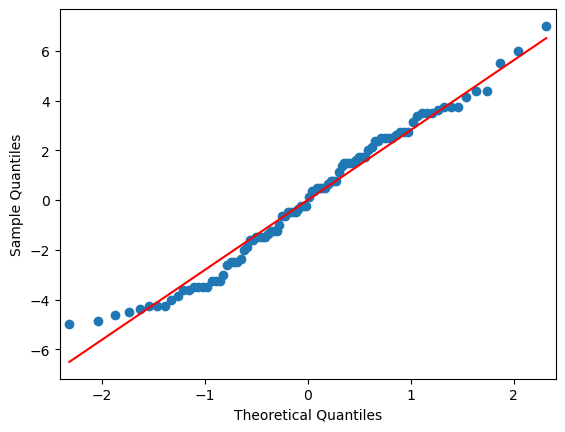

In [62]:
from statsmodels.graphics.gofplots import qqplot
qqplot(residuals, line='s')
plt.show()

In [64]:
shapiro_test = stats.shapiro(residuals)
print(f'Shapiro-Wilk Test p-value: {shapiro_test.pvalue}')

Shapiro-Wilk Test p-value: 0.06416124012466147


In [68]:
from scipy.stats import levene

In [70]:
levene_test1 = stats.levene(df[df['Department'] == 'HR']['Productivity_Score'],
                           df[df['Department'] == 'IT']['Productivity_Score'],
                           df[df['Department'] == 'Marketing']['Productivity_Score'],
                           df[df['Department'] == 'Sales']['Productivity_Score'])

levene_test2 = stats.levene(df[df['Experience_Level'] == 'Junior']['Productivity_Score'],
                           df[df['Experience_Level'] == 'Mid-Level']['Productivity_Score'],
                           df[df['Experience_Level'] == 'Senior']['Productivity_Score'])
#stat, p_value = levene(levene_test1, levene_test2)
print(levene_test1, levene_test2)

LeveneResult(statistic=1.7893221388014318, pvalue=0.15469193820700664) LeveneResult(statistic=4.211741723216121, pvalue=0.017742540650263337)
